In [1]:

import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import os

(455, 276, 3)


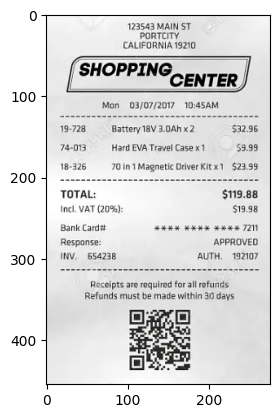

In [2]:
root_path = os.getcwd()
img_path = root_path+"\\test_imgs\\shop_invoice.png"
cv_img = cv2.imread(img_path)
print(cv_img.shape)
plt.imshow(cv_img)

(455, 276)


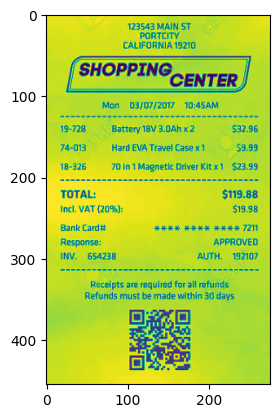

In [3]:
gray_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)
print(gray_img.shape)
plt.imshow(gray_img) 

### Line Detection

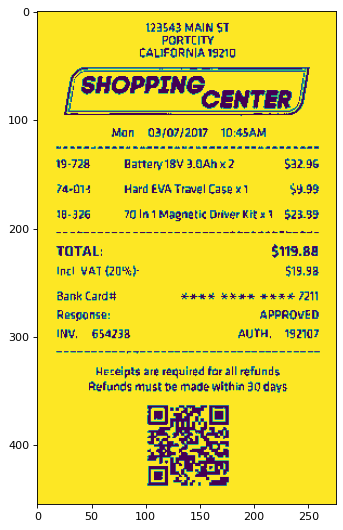

In [4]:
threshold_img = cv2.threshold(gray_img,50,100,8)[1]
figure(figsize=(10,8),dpi=80)
plt.imshow(threshold_img)

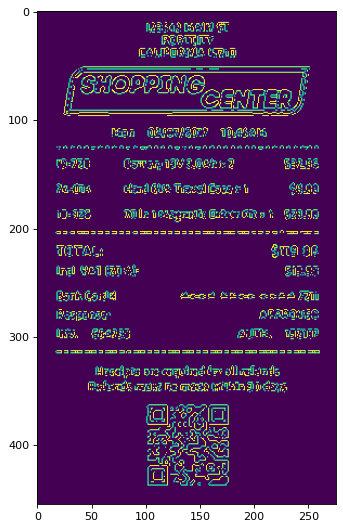

In [5]:
edges = cv2.Canny(threshold_img, 50, 200, None, 3)
figure(figsize=(10,8),dpi=80)
plt.imshow(edges)

In [6]:

import math


#lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)


rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 230  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(cv_img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)
print("No of lines : ",len(lines))
print(lines)

No of lines :  7
[[[ 18 313 260 313]]

 [[ 18 315 260 315]]

 [[ 18 125 259 125]]

 [[ 18 205 259 205]]

 [[ 18 203 259 203]]

 [[ 24 126 259 126]]

 [[ 17 204 259 204]]]


In [7]:
print(lines[0][0][0])

18


In [8]:
actual_lines = []
actual_points =[]
y_distance = 20



for line in lines:
    for x1,y1,x2,y2 in line:
   
        if len(actual_lines) == 0:
            #add first line point
            actual_lines.append(y1)
            actual_points.append([x1,y1,x2,y2])
           
        else:
            is_needAdd =True
            for actual_y in actual_lines:
                # first line and second line must be a least y_distance
                if(np.abs(actual_y-y1) < y_distance):
                    is_needAdd = False
                    break
            
            if is_needAdd:
                actual_lines.append(y1)   
                actual_points.append([x1,y1,x2,y2])

print(actual_lines)
print(actual_points)

[np.int32(313), np.int32(125), np.int32(205)]
[[np.int32(18), np.int32(313), np.int32(260), np.int32(313)], [np.int32(18), np.int32(125), np.int32(259), np.int32(125)], [np.int32(18), np.int32(205), np.int32(259), np.int32(205)]]


[[np.int32(18), np.int32(313), np.int32(260), np.int32(313)], [np.int32(18), np.int32(125), np.int32(259), np.int32(125)], [np.int32(18), np.int32(205), np.int32(259), np.int32(205)]]


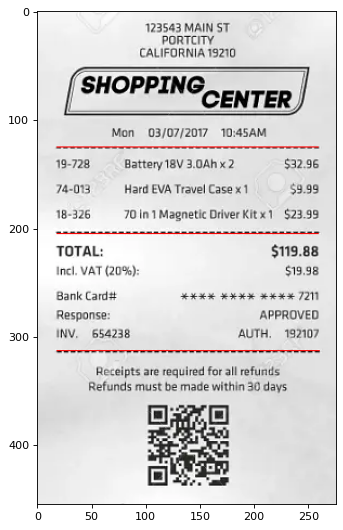

In [9]:
img_output = cv_img.copy()
print(actual_points)
for x1,y1,x2,y2 in actual_points:
    cv2.line(img_output,(x1,y1),(x2,y2),(255,0,0),1)
figure(figsize=(10,8),dpi=80)
plt.imshow(img_output)

[np.int32(18), np.int32(125), np.int32(259), np.int32(125)]
(125, 241, 3)


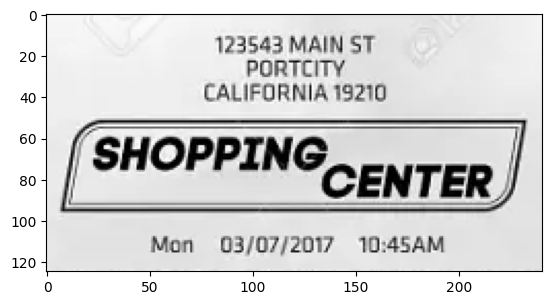

In [10]:
img = cv_img.copy()

fist_part = actual_points[1]
print(fist_part)
first_img = img[:fist_part[3],fist_part[0]:fist_part[2],:]
print(first_img.shape)
plt.imshow(first_img)

[np.int32(18), np.int32(205), np.int32(259), np.int32(205)]
(80, 241, 3)


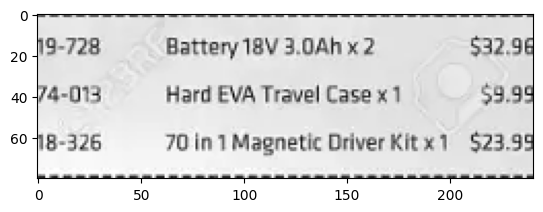

In [23]:
second_part = actual_points[2]
print(second_part)
second_img = img[fist_part[3]:second_part[3],second_part[0]:second_part[2],:]
print(second_img.shape)
plt.imshow(second_img)

205
313


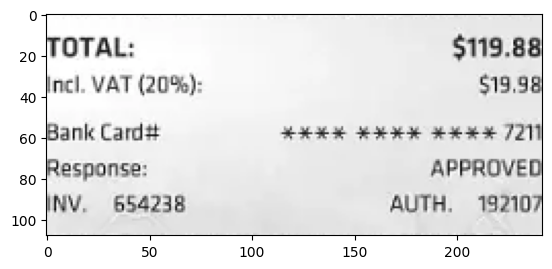

In [24]:

third_part = actual_points[0]

print(second_part[3])
print(third_part[3])


third_img = img[second_part[3]:third_part[3],third_part[0]:third_part[2],:]
plt.imshow(third_img)

In [13]:
#!pip install pytesseract
#!pip install tesseract-ocr

In [18]:
import pytesseract
print(pytesseract)

## Download exe from this url
## https://github.com/UB-Mannheim/tesseract/wiki
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

<module 'pytesseract' from 'c:\\Users\\Happy\\.conda\\envs\\ths\\Lib\\site-packages\\pytesseract\\__init__.py'>


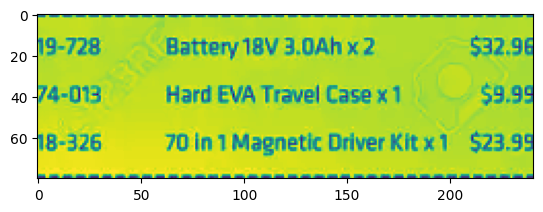

In [36]:
test_second_img = second_img.copy()

gray_image = cv2.cvtColor(test_second_img, cv2.COLOR_BGR2GRAY) 
  

plt.imshow(gray_image)

In [38]:

data = pytesseract.image_to_data(gray_image,output_type = 'dict')
n_data = len(data['text'])
for i in range(n_data):
    if data['conf'][i] > 10 and len(data['text'][i])>3:

        print(data['text'][i])
        #print(data['text'][i])

print("#########")
print(data['text'])

19-728
Battery
74-013
Hard
EVATravelCasex1
18-326
-70in
Magnetic
Driver
Kitx1
$23.95
#########
['', '', '', '', ' ', '', '', '', '19-728', 'Battery', '18V3.0Ahx2', 'S32.', '', '', '', '74-013', 'Hard', 'EVATravelCasex1', '$98', '', '', '', '18-326', '-70in', 'Magnetic', 'Driver', 'Kitx1', '$23.95', '', '', '', '']


In [27]:
img_path = r"C:\Users\Happy\github\ML-in-Prod-batch-1\3_image_processing_techniques\test_imgs\test_5.png"
cv_image = cv2.imread(img_path)

data = pytesseract.image_to_data(cv_image,output_type = 'dict')
n_data = len(data['text'])
for i in range(n_data):
    if data['conf'][i] > 20 and len(data['text'][i])>3:

        print(data['text'][i])

TharHtet
Data
Scientist
“Focus
signal
over
noise"
tharhtet1234@gmail.com
public.tableau.com/profile/thar.htet-sanit!/
github.com/tharhtetsan
WORK
EXPERIENCE
Artificial
Intelligence
Engineer
Metro
Computer
Myanmar
Yangon,
Myanmar
Achievements/Tasks
research
succeed
applications
+959783847610
facebook.com/tharhtet.san.902
SKILLS
Machine
Learning
Deep
Learning
